https://sefiks.com/2020/07/11/face-recognition-with-dlib-in-python/

http://datahacker.rs/017-face-detection-algorithms-comparison/

In [1]:
import os
import gdown

In [5]:
"""#output=[]
def unzip_bz2_file(zipped_file_name):
    zipfile = bz2.BZ2File(zipped_file_name)
    data = zipfile.read()
    newfilepath = output[:-4]
    open(newfilepath, 'wb').write(data)

def download_file(url):
    output = url.split("/")[-1]
    gdown.download(url, output, quiet=False)

if os.path.isfile('shape_predictor_5_face_landmarks.dat') != True:
    print("shape_predictor_5_face_landmarks.dat is going to be downloaded")
    url = "http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2"
    download_file(url)
    unzip_bz2_file(output)

if os.path.isfile('dlib_face_recognition_resnet_model_v1.dat') != True:
    print("dlib_face_recognition_resnet_model_v1.dat is going to be downloaded")
    url = "http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2"
    download_file(url)
    unzip_bz2_file(output)"""

'#output=[]\ndef unzip_bz2_file(zipped_file_name):\n    zipfile = bz2.BZ2File(zipped_file_name)\n    data = zipfile.read()\n    newfilepath = output[:-4]\n    open(newfilepath, \'wb\').write(data)\n\ndef download_file(url):\n    output = url.split("/")[-1]\n    gdown.download(url, output, quiet=False)\n\nif os.path.isfile(\'shape_predictor_5_face_landmarks.dat\') != True:\n    print("shape_predictor_5_face_landmarks.dat is going to be downloaded")\n    url = "http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2"\n    download_file(url)\n    unzip_bz2_file(output)\n\nif os.path.isfile(\'dlib_face_recognition_resnet_model_v1.dat\') != True:\n    print("dlib_face_recognition_resnet_model_v1.dat is going to be downloaded")\n    url = "http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2"\n    download_file(url)\n    unzip_bz2_file(output)'

In [44]:
import dlib
import matplotlib.pyplot as plt
import numpy as np

In [6]:
pwd

'C:\\Users\\dell\\Capstone'

In [9]:
detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor("shape_predictor_5_face_landmarks.dat")
model = dlib.face_recognition_model_v1("dlib_face_recognition_resnet_model_v1.dat")

In [26]:
img1_path=r"C:\Users\dell\Capstone\img1.jpg"
img2_path=r"C:\Users\dell\Capstone\ramu.jpg"


In [27]:
#load images
img1 = dlib.load_rgb_image(img1_path)
img2 = dlib.load_rgb_image(img2_path)

In [28]:
type(img2)

numpy.ndarray

In [29]:
#detection
img1_detection = detector(img1, 1)
img2_detection = detector(img2, 1)

In [30]:
type(img1_detection)

dlib.rectangles

In [31]:
len(img2_detection)

1

In [32]:
img1_shape = sp(img1, img1_detection[0])
img2_shape = sp(img2, img2_detection[0])

In [33]:
#aligned
img1_aligned = dlib.get_face_chip(img1, img1_shape)
img2_aligned = dlib.get_face_chip(img2, img2_shape)

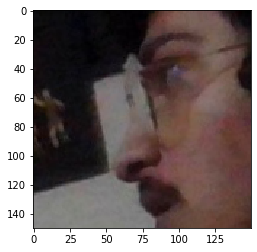

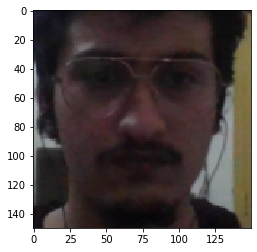

In [39]:
plt.imshow(img1_aligned)
plt.show()
plt.imshow(img2_aligned)
plt.show()

In [40]:
#representation
img1_representation = model.compute_face_descriptor(img1_aligned)
img2_representation = model.compute_face_descriptor(img2_aligned)

In [41]:
img1_representation.shape

(128, 1)

In [42]:
img2_representation.shape

(128, 1)

In [45]:
img1_representation = np.array(img1_representation)
img2_representation = np.array(img2_representation)

In [47]:
def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

When using a distance threshold of 0.6, the dlib model obtains an accuracy of 99.38% on the standard LFW face recognition benchmark, which is comparable to other state-of-the-art methods for face recognition as of February 2017. This accuracy means that, when presented with a pair of face images, the tool will correctly identify if the pair belongs to the same person or is from different people 99.38% of the time.

In [48]:
distance = findEuclideanDistance(img1_representation, img2_representation)
threshold = 0.6 
 
if distance < threshold: print("they are same")
else: print("they are different")
 

 

 




#


they are same


In [49]:
print(distance)

0.511792242142589
